In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
from pylab import * 

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
##processing data
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
##load data

df = pd.read_csv('~/Desktop/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [16]:
## chcking for missing values

df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
## show missing values and its datatype

for column in df.columns:
    if df[column].isnull().sum() != 0:
        print(f"{column} => Missing Values : {df[column].isnull().sum()}, {df[column].dtypes}")

name => Missing Values : 16, object
host_name => Missing Values : 21, object
last_review => Missing Values : 10052, object
reviews_per_month => Missing Values : 10052, float64


In [8]:
## fill reviews_per_month with mean()

df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

## fill last_review with forward fill

df['last_review'] = df['last_review'].fillna(method = 'ffill')

## drop nan of name and host_name
df.dropna(inplace = True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [49]:
## double check for missing value
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# what are the top 15 most expensive airbnb neighborhood in NYC 

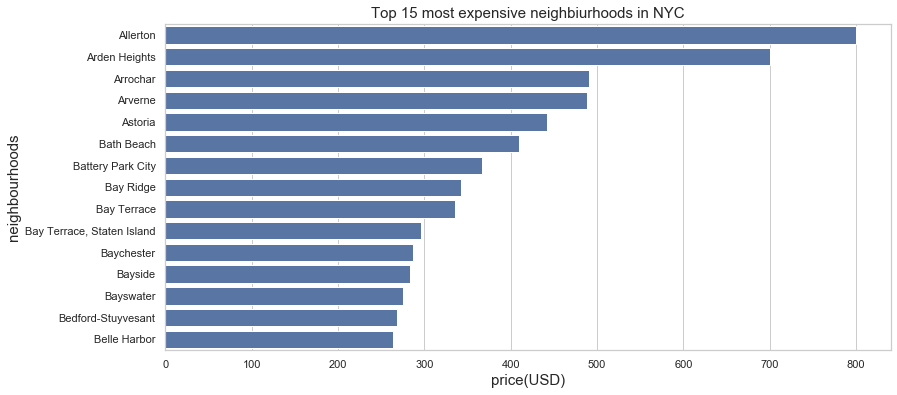

In [83]:
result = df.groupby('neighbourhood')['price'].mean().round().sort_values(ascending = False)

neighbourhoods = [neighbourhood for neighbourhood, df in df.groupby('neighbourhood')]

plt.figure(figsize = (13,6))
sns.barplot(x = result[0:15], y = neighbourhoods[0:15], color = 'b')
plt.ylabel('neighbourhoods',size = 15)
plt.xlabel('price(USD)',size = 15)
plt.title('Top 15 most expensive neighbiurhoods in NYC',size = 15)
plt.show()


# what are the mean prices of each neighbourhood group?

Text(0.5, 1.0, 'Mean Price of Each Neighbourhood Group in NYC')

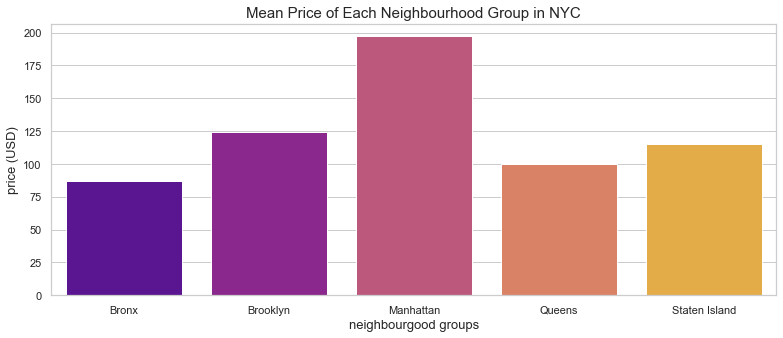

In [6]:
## mean prices
result = df.groupby('neighbourhood_group')['price'].mean().round()

n_groups = [neighbourhood_group for neighbourhood_group, df in df.groupby('neighbourhood_group')]

plt.figure(figsize = (13,5))
sns.barplot(data = df, x = n_groups, y = result, palette = "plasma")
plt.xlabel('neighbourgood groups',size = 13)
plt.ylabel('price (USD)',size = 13)
plt.title('Mean Price of Each Neighbourhood Group in NYC', size = 15)

# What is the distribution and desity of price in each neighbourhood group?

Text(0.5, 1.0, 'price under 500 dollars of each neighbourhood group')

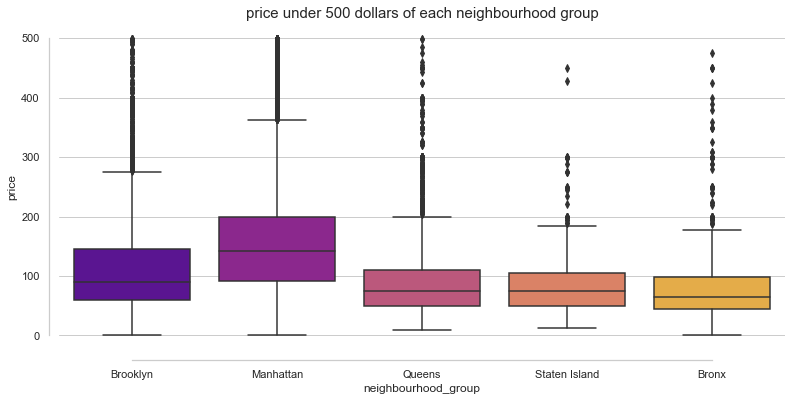

In [5]:
## grouped boxplot 
plt.figure(figsize = (13,6))
filtered_price = df.loc[df['price'] < 500]
sns.boxplot(data = filtered_price, x ='neighbourhood_group', y = 'price',palette = 'plasma')
sns.despine(offset = 10,trim = True)
plt.title('price under 500 dollars of each neighbourhood group',size = 15)

This boxplot shows that the median prices of Brooklyn, Queens, Staten Island, and Bronx are under 100 dollars, and the median price of Manhattan is approximately 150 dollars, which is the most expensive meighbourood group. For airbnb under 500 dollars of each neighbourhood group, all five neighbourhoods have many price outliers. In Manhattan, 25% airbnb are more than 200 dollars, and Staten Island has the least price outliers.

Text(0.5, 1.0, 'distribution and desity of price in each neighbourhood group')

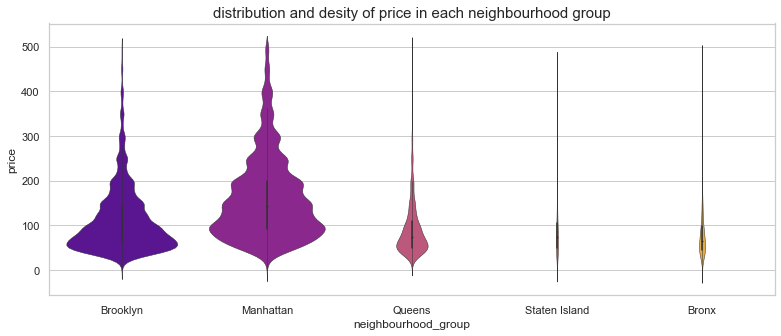

In [63]:
## violinpolt
plt.figure(figsize = (13,5))
result = df[df['price'] < 500]
sns.violinplot(data = result, x ='neighbourhood_group', y = 'price',scale = 'count', 
               linewidth = 0.5, palette = 'plasma')
plt.title('distribution and desity of price in each neighbourhood group',size = 15)

# Number of rooms of different room type in each neighbourhood group

<function matplotlib.pyplot.show(*args, **kw)>

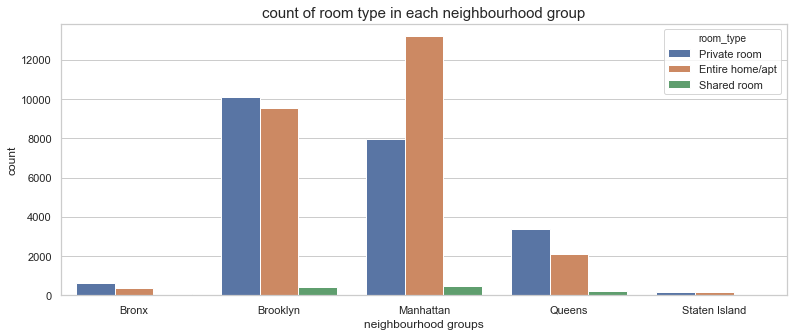

In [62]:
## count of room type in each neighbourhood group

plt.figure(figsize = (13,5))
sns.countplot(df.sort_values('neighbourhood_group').neighbourhood_group, hue = df['room_type'])
plt.xlabel('neighbourhood groups')
plt.title('count of room type in each neighbourhood group', size = 15)
plt.show

# What are the mean prices of each room type in each neighbourhood group?

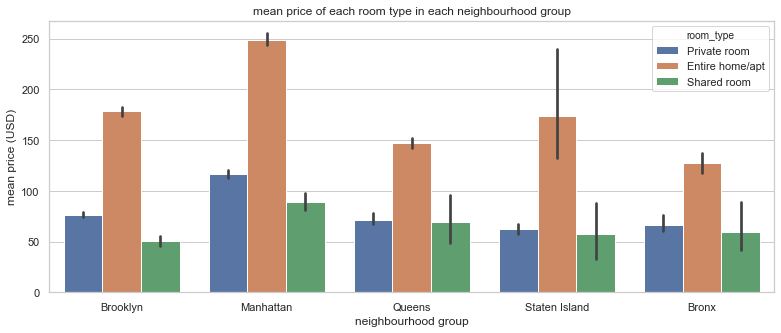

In [7]:
plt.figure(figsize = (13,5))
sns.barplot(data = df, x = 'neighbourhood_group', y = 'price', hue ='room_type')
plt.xlabel('neighbourhood group')
plt.ylabel('mean price (USD)')
plt.title('mean price of each room type in each neighbourhood group')
plt.show()

# Correlation between price and different variables

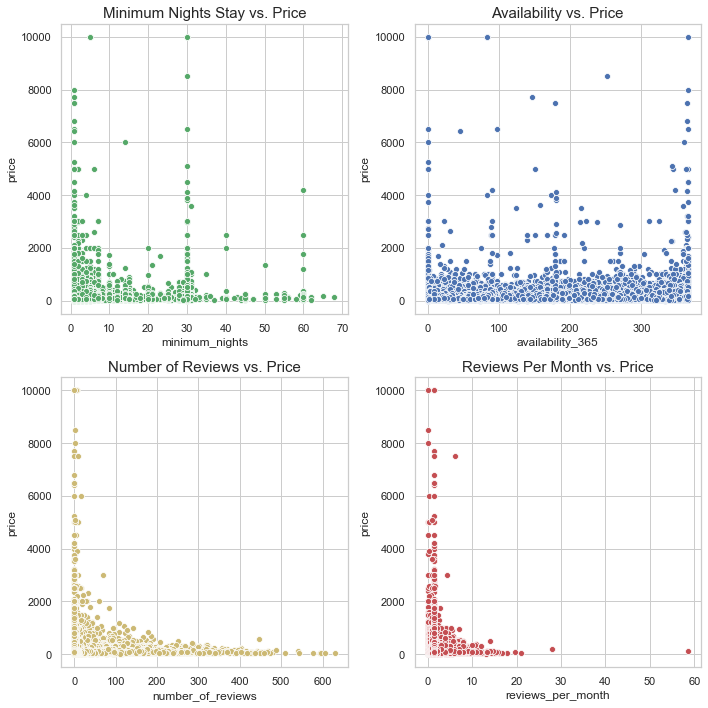

In [131]:
## scatter plot 
plt.subplots(figsize = (10,10))
subplot(2,2,1)

filtered_mininights = df.loc[df['minimum_nights'] < 70]
sns.scatterplot(data = filtered_mininights, x = 'minimum_nights', y = 'price', linewidths = 0, color = 'g')
plt.title('Minimum Nights Stay vs. Price', size = 15)

subplot(2,2,2)
sns.scatterplot(data = df, x = 'availability_365', y = 'price', linewidths = 0, color = 'b')
plt.title('Availability vs. Price', size = 15)

subplot(2,2,3)
sns.scatterplot(data = df, x = 'number_of_reviews', y = 'price', linewidths = 0, color = 'y')
plt.title('Number of Reviews vs. Price', size = 15)

subplot(2,2,4)
sns.scatterplot(data = df, x = 'reviews_per_month', y = 'price', linewidths = 0, color = 'r')
plt.title('Reviews Per Month vs. Price', size = 15)

plt.tight_layout()

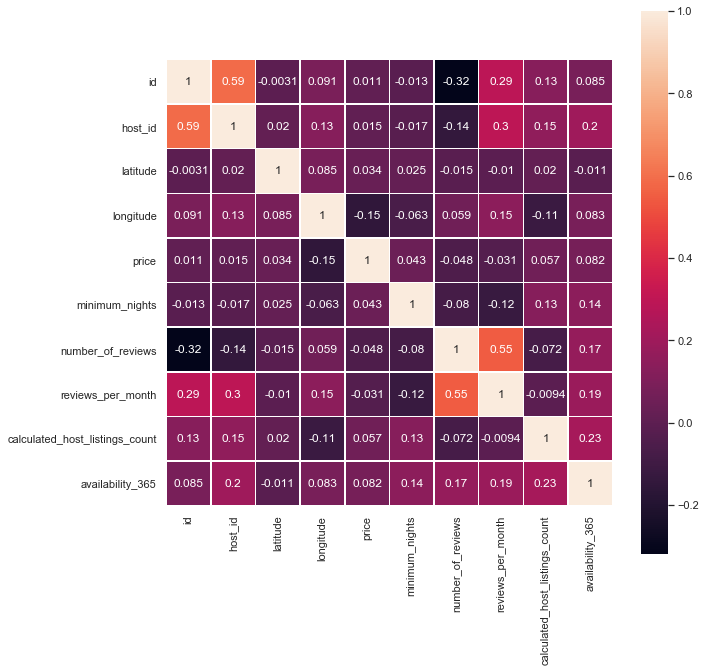

In [8]:
## correaltion matrix 

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, square = True, linewidths = .5)
plt.show()

From the correlation matrix shows that the correaltion between review_per_month and price is -0.022, the coorelation between number_of_review and price is -0.048, which indicates that they are weakly megatively correalted. Higher price listings have less views.

# Map of neighbourhood group in NYC

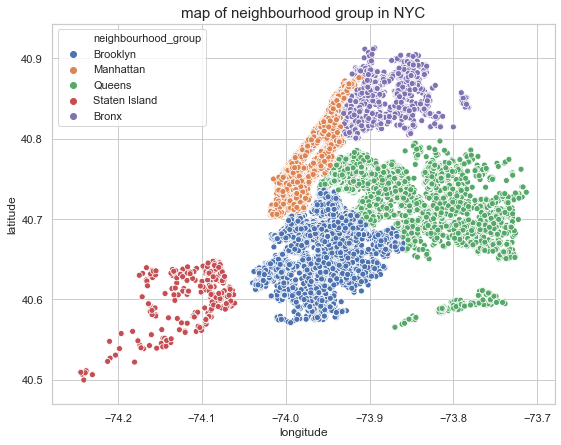

In [67]:
plt.figure(figsize=(9,7))
ax = sns.scatterplot(data = df, x = df.longitude, y = df.latitude, hue = df.neighbourhood_group)
plt.title('map of neighbourhood group in NYC',size = 15)
plt.show()


# Price Prediction with Linear Regression

In [166]:
## reload data 
airbnb_ny = pd.read_csv('~/Desktop/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

## fill&clean nan data

airbnb_ny['reviews_per_month'] = airbnb_ny['reviews_per_month'].fillna(airbnb_ny['reviews_per_month'].mean())

## drop nan of name and host_name
airbnb_ny.drop(['last_review'], axis = 1, inplace = True)
airbnb_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [168]:
## data preprocessing 

le = LabelEncoder()
le.fit(airbnb_ny['neighbourhood_group'])
airbnb_ny['neighbourhood_group'] = le.transform(airbnb_ny['neighbourhood_group'])

le.fit(airbnb_ny['neighbourhood'])
airbnb_ny['neighbourhood'] = le.transform(airbnb_ny['neighbourhood'])

le.fit(airbnb_ny['room_type'])
airbnb_ny['room_type'] = le.transform(airbnb_ny['room_type'])

airbnb_ny.drop(['id','name','host_id','host_name'], axis = 1, inplace = True)
airbnb_ny.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149,1,9,0.210000,6,365
1,2,127,40.75362,-73.98377,0,225,1,45,0.380000,2,355
2,2,94,40.80902,-73.94190,1,150,3,0,1.373221,1,365
3,1,41,40.68514,-73.95976,0,89,1,270,4.640000,1,194
4,2,61,40.79851,-73.94399,0,80,10,9,0.100000,1,0


In [169]:
##multiple linear regression
##create training and test variables
## reviews_per_month and number_of_reviews are not included in independent variables 

X = df[['neighbourhood_group','neighbourhood','latitude','longitude','room_type',
        'price','minimum_nights','calculated_host_listings_count','availability_365']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(34200, 9) (34200,)
(14658, 9) (14658,)


In [173]:
##fit a model

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print(predictions)


[140. 399. 117. ...  43.  80.  75.]


Text(0, 0.5, 'predictions')

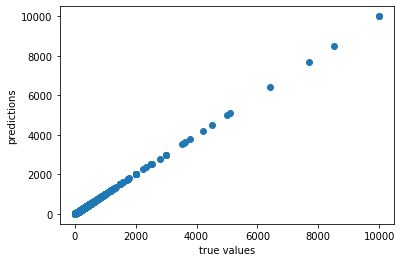

In [175]:
## the line 
plt.scatter(y_test, predictions)
plt.xlabel('true values')
plt.ylabel('predictions')